# Text (28/4 - 2021)

## Exercise

Read and write a CSV file containing:

<pre>
artist,song,length
ZZ Top,La Grange,3:50
Iron Butterfly,In-A-Gadda-Da-Vida,17:04
Led Zeppelin,Whole Lotta Love,5:33
</pre>

In [47]:
with open('some_rows.csv', 'w') as file:
    file.write(
'''artist,song,length
ZZ Top,La Grange,3:50
Iron Butterfly,In-A-Gadda-Da-Vida,17:04
Led Zeppelin,Whole Lotta Love,5:33    
''')

In [49]:
# Skip newline argument, see that it adds an additional newline

import csv

data = [
    ['artist', 'song', 'length'],
    ['ZZ Top', 'La Grange', '3:50'],
    ['Iron Butterfly', 'In-A-Gadda-Da-Vida', '17:04'],
    ['Led Zeppelin', 'Whole Lotta Love', '5:33']
]

with open('some_rows.csv', 'w', newline='') as file:
#with open('some_rows.csv', 'w') as file:
    csv_out = csv.writer(file)
#    csv_out = csv.writer(file, delimiter="\t")
    for row in data:
        csv_out.writerow(row)    

In [50]:
with open('some_rows.csv') as file:
    for line in file:
        print(line, end='')  # skip end, and see that it reads
#        print([ord(char) for char in line])

artist,song,length
ZZ Top,La Grange,3:50
Iron Butterfly,In-A-Gadda-Da-Vida,17:04
Led Zeppelin,Whole Lotta Love,5:33


In [56]:
with open('some_rows.csv') as file:
    csv_in = csv.reader(file, delimiter=',')
    header = next(csv_in)  # csv_in is an iterator for the rows in the CSV file
    print('Header:', header)
    for i, row in enumerate(csv_in, start=1):
        print(i, row)

Header: ['artist', 'song', 'length']
1 ['ZZ Top', 'La Grange', '3:50']
2 ['Iron Butterfly', 'In-A-Gadda-Da-Vida', '17:04']
3 ['Led Zeppelin', 'Whole Lotta Love', '5:33']


In [36]:
with open('some_rows.csv') as file:
    csv_in = csv.DictReader(file, delimiter='\t')  # read rows as dictionaries, 1st row are keys
    for row in csv_in:
        print(row)

{'artist': 'ZZ Top', 'song': 'La Grange', 'length': '3:50'}
{'artist': 'Iron Butterfly', 'song': 'In-A-Gadda-Da-Vida', 'length': '17:04'}
{'artist': 'Led Zeppelin', 'song': 'Whole Lotta Love', 'length': '5:33'}


## Exercise

Save the following to a JSON file:

```
[
    {'id': 42, 'value': 'Something exciting'},
    {'value': 'Also exciting news', 'id': 7}
]
```

In [91]:
import json

data = (
    {'id': 42, 'value': 'Something exciting'},
    {'value': 'Also exciting news', 'id': 7}
)

with open('some_json.json', 'w') as file:
    json.dump(data, file)
#    json.dump(data, file, indent=2)
#    json.dump(data, file, indent=2, sort_keys=True)

In [92]:
with open('some_json.json') as file:
    print(''.join(file))

[{"id": 42, "value": "Something exciting"}, {"value": "Also exciting news", "id": 7}]


In [94]:
with open('some_json.json') as file:
    data = json.load(file)
print(data)
print(data[1]['value'])

[{'id': 42, 'value': 'Something exciting'}, {'value': 'Also exciting news', 'id': 7}]
Also exciting news


In [100]:
# try to use pickle instead, Python local format

import pickle

data = (
    {'id': 42, 'value': 'Something exciting'},
    {'value': 'Also exciting news', 'id': 7}
)

with open('some_pickel.pickle', 'wb') as file:  # important that we use b to say it is bytes
    pickle.dump(data, file)

In [117]:
with open('some_pickel.pickle', 'rb') as file:  # important that we use b to say it is bytes
    data = pickle.load(file)
print(data)
print(data[1]['value'])

({'id': 42, 'value': 'Something exciting'}, {'value': 'Also exciting news', 'id': 7})
Also exciting news


In [120]:
with open('some_pickel.pickle', 'rb') as file:
    print(file.read())

b'\x80\x04\x95J\x00\x00\x00\x00\x00\x00\x00}\x94(\x8c\x02id\x94K*\x8c\x05value\x94\x8c\x12Something exciting\x94u}\x94(h\x02\x8c\x12Also exciting news\x94h\x01K\x07u\x86\x94.'


In [115]:
with open('some_pickel.pickle', 'rb') as file:
    bytes = file.read()
    for byte in bytes:
        print(byte, end=' ')

128 4 149 74 0 0 0 0 0 0 0 125 148 40 140 2 105 100 148 75 42 140 5 118 97 108 117 101 148 140 18 83 111 109 101 116 104 105 110 103 32 101 120 99 105 116 105 110 103 148 117 125 148 40 104 2 140 18 65 108 115 111 32 101 120 99 105 116 105 110 103 32 110 101 119 115 148 104 1 75 7 117 134 148 46 

In [116]:
type(bytes)

bytes

## Exercise 

XML - Open Street Map

Download a small map from www.openstreetmap.org as XML and plot it using matplotlib.

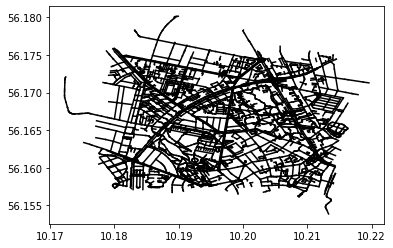

In [121]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

tree = ET.parse('map.osm')
root = tree.getroot()

nodes = [child for child in root if child.tag == 'node']
V = {node.attrib['id']: (float(node.attrib['lon']), float(node.attrib['lat'])) for node in nodes}

ways = [child for child in root if child.tag == 'way']

edges = []
for way in ways:
    for child in way:
        if child.tag == 'tag' and 'k' in child.attrib and child.attrib['k'] == 'highway':
            points = [child.attrib['ref'] for child in way if child.tag == 'nd']
            for p, q in zip(points, points[1:]):
                edges.append((p, q))
        
data = []
for p, q in edges:
    xs, ys = zip(V[p], V[q])
    data.extend((xs, ys, '-'))

plt.plot(*data, color='k')  # edges       
plt.show()

In [125]:
count = 0
for child in root:
    if child.tag == 'node':
        print(child.tag, child.attrib['lat'])
        count += 1
        if count > 10:
            break
        

node 56.1748392
node 56.1748491
node 56.1748443
node 56.1741359
node 56.1699079
node 56.1677092
node 56.1646877
node 56.1646251
node 56.1602780
node 56.1616331
node 56.1649995
